# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response_json = response.json()
        # city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json['coord']['lat']
        city_lng = response_json['coord']['lon']
        city_max_temp = response_json['main']['temp']
        city_humidity = response_json['main']['humidity']
        city_clouds = response_json['clouds']['all']
        city_wind = response_json['wind']['speed']
        city_country = response_json['sys']['country']
        city_date = response_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taroa
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | isola di capo rizzuto
Processing Record 6 of Set 1 | lensk
Processing Record 7 of Set 1 | iskateley
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | bel ombre
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | chonchi
Processing Record 17 of Set 1 | side
Processing Record 18 of Set 1 | geraldton
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | port-aux-fr

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [6]:
# define a function to convert unix_timestamps
def convert_to_date(unix_timestamp):
    time_struct = time.gmtime(unix_timestamp)
    formatted_date = time.strftime('%Y-%m-%d', time_struct)
    return formatted_date

# Format the time struct as yyyy-mm-dd
city_data_df['Formatted Date'] = city_data_df['Date'].apply(lambda x: convert_to_date(x))

# Drop unused date column
city_data_df = city_data_df.drop('Date',axis=1)

# rename formatted date
city_data_df = city_data_df.rename(columns={'Formatted Date':'Date'})

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taroa,8.7058,171.2275,300.25,85,100,10.78,MH,2023-11-11
1,hawaiian paradise park,19.5933,-154.9731,295.75,92,99,4.01,US,2023-11-11
2,blackmans bay,-43.0167,147.3167,290.22,68,60,0.45,AU,2023-11-11
3,badger,64.8000,-147.5333,261.07,98,93,0.58,US,2023-11-11
4,isola di capo rizzuto,38.9600,17.0933,288.81,71,8,9.52,IT,2023-11-11


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taroa,8.7058,171.2275,300.25,85,100,10.78,MH,2023-11-11
1,hawaiian paradise park,19.5933,-154.9731,295.75,92,99,4.01,US,2023-11-11
2,blackmans bay,-43.0167,147.3167,290.22,68,60,0.45,AU,2023-11-11
3,badger,64.8000,-147.5333,261.07,98,93,0.58,US,2023-11-11
4,isola di capo rizzuto,38.9600,17.0933,288.81,71,8,9.52,IT,2023-11-11


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

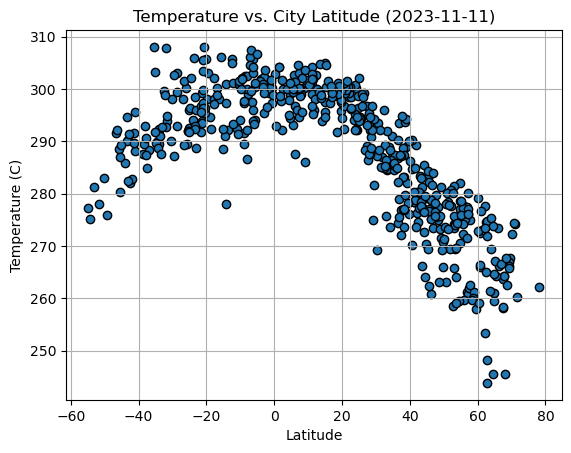

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black',linewidth=1)

# Incorporate the other graph properties
plt.title(f"Temperature vs. City Latitude ({city_data_df['Date'][0]})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid(1)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

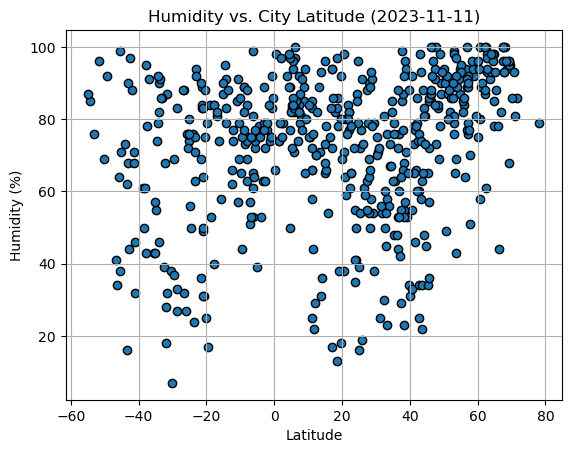

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black',linewidth=1)

# Incorporate the other graph properties
plt.title(f"Humidity vs. City Latitude ({city_data_df['Date'][0]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(1)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

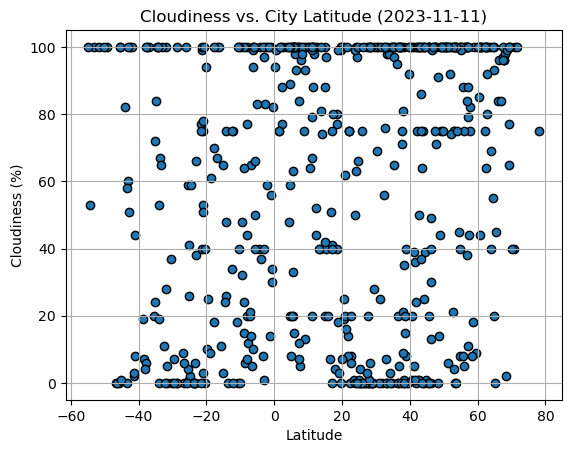

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black',linewidth=1)

# Incorporate the other graph properties
plt.title(f"Cloudiness vs. City Latitude ({city_data_df['Date'][0]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(1)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

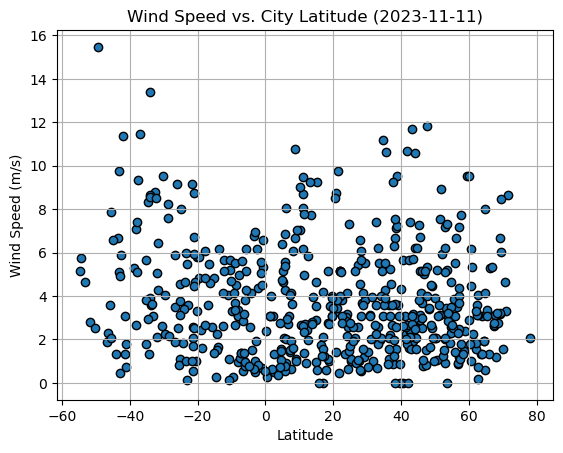

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black',linewidth=1)

# Incorporate the other graph properties
plt.title(f"Wind Speed vs. City Latitude ({city_data_df['Date'][0]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(1)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_reg_plots(x_values,y_values,title,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.title(title)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values)+.1*(max(x_values)-min(x_values)),min(y_values)+.1*(max(y_values)-min(y_values))),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue}")
    plt.show()
    return


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taroa,8.7058,171.2275,300.25,85,100,10.78,MH,2023-11-11
1,hawaiian paradise park,19.5933,-154.9731,295.75,92,99,4.01,US,2023-11-11
3,badger,64.8000,-147.5333,261.07,98,93,0.58,US,2023-11-11
4,isola di capo rizzuto,38.9600,17.0933,288.81,71,8,9.52,IT,2023-11-11
5,lensk,60.7253,114.9278,265.92,80,100,6.16,RU,2023-11-11


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,290.22,68,60,0.45,AU,2023-11-11
7,port mathurin,-19.6833,63.4167,298.07,79,10,4.82,MU,2023-11-11
12,waitangi,-43.9535,-176.5597,285.83,73,82,1.34,NZ,2023-11-11
13,bel ombre,-4.6167,55.4167,301.06,78,40,2.57,SC,2023-11-11
15,chonchi,-42.6128,-73.8092,282.10,97,100,5.87,CL,2023-11-11


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8885486683879881


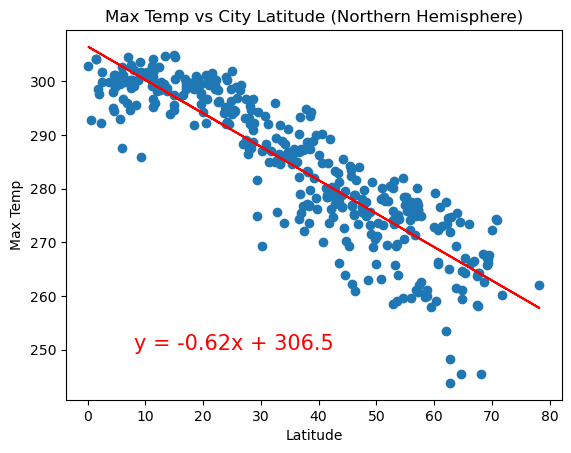

In [16]:
# Linear regression on Northern Hemisphere
lin_reg_plots(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Max Temp vs City Latitude (Northern Hemisphere)','Latitude','Max Temp')


The r-value is: 0.6377594218183124


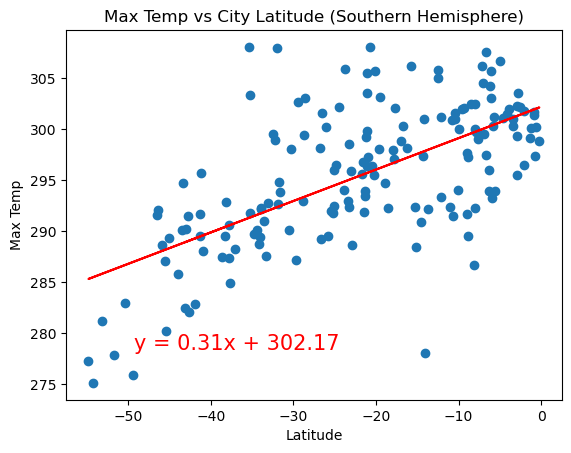

In [17]:
# Linear regression on Southern Hemisphere
lin_reg_plots(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Max Temp vs City Latitude (Southern Hemisphere)','Latitude','Max Temp')

**Discussion about the linear relationship:** There is a strong linear relationship between temperature and latitude in both the Northern and Southern hemispheres. The chart for the Northern hemisphere shows that as latitude increases, temperature decreases. This makes sense because higher latitudes are futher from the equator and receive less direct sunlight. The chart for the Southern hemisphere, directly above, shows a similarly strong relationship, but in the opposite direction. As latitude increases (get lets negative), temperature increases. This makes sense because latitudes closer to 0 are closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22023021641590743


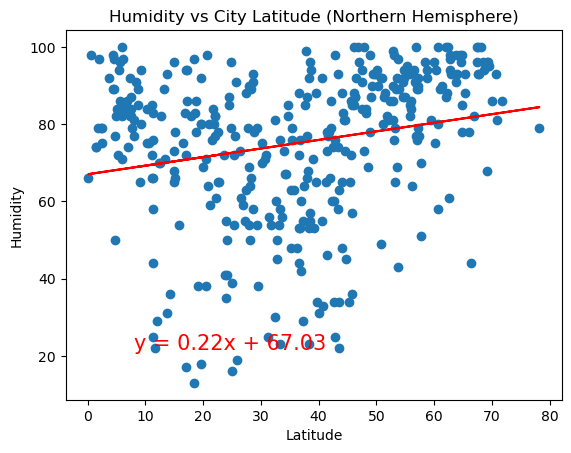

In [18]:
# Northern Hemisphere
lin_reg_plots(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Humidity vs City Latitude (Northern Hemisphere)','Latitude','Humidity')


The r-value is: 0.16507285115298884


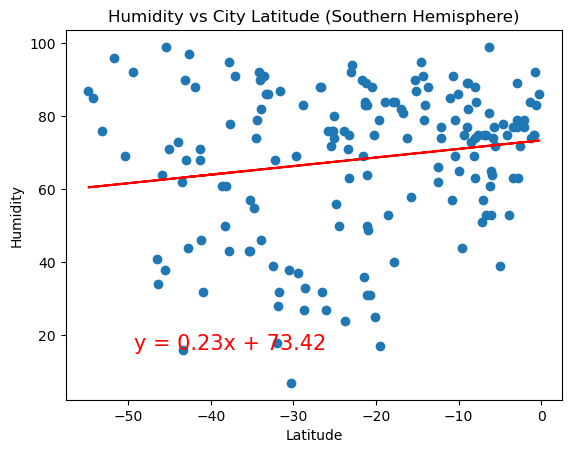

In [20]:
# Southern Hemisphere
lin_reg_plots(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Humidity vs City Latitude (Southern Hemisphere)','Latitude','Humidity')


**Discussion about the linear relationship:** There is not a strong relationship between latitude and humidity in either hemisphere. In both hemispheres, there is very weak positive correlation between Latitude and Humidity and the positive coefficient on x in the above charts show that.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08502225497086918


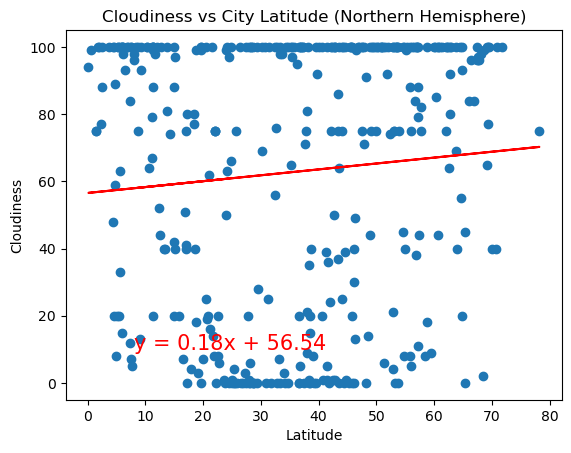

In [23]:
# Northern Hemisphere
lin_reg_plots(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Cloudiness vs City Latitude (Northern Hemisphere)','Latitude','Cloudiness')


The r-value is: 0.025694846215745103


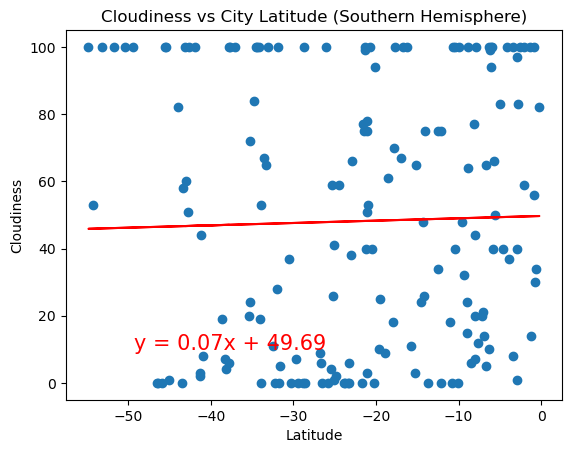

In [24]:
# Southern Hemisphere
lin_reg_plots(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Cloudiness vs City Latitude (Southern Hemisphere)','Latitude','Cloudiness')


**Discussion about the linear relationship:** Latitude and cloudiness have an even weaker relatiosnhip than latitude and humidity. There is very low correlation and the r value in both the northern and southern hemispheres is close to 0.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.023842211792305938


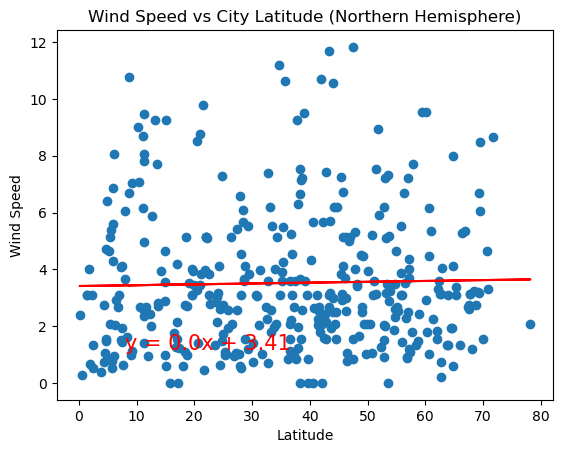

In [25]:
# Northern Hemisphere
lin_reg_plots(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Wind Speed vs City Latitude (Northern Hemisphere)','Latitude','Wind Speed')


The r-value is: -0.29089728260747316


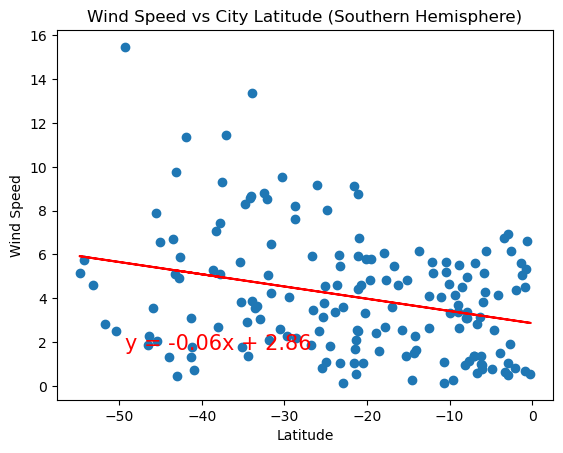

In [26]:
# Southern Hemisphere
lin_reg_plots(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Wind Speed vs City Latitude (Southern Hemisphere)','Latitude','Wind Speed')


**Discussion about the linear relationship:** In the northern hemisphere, latitude and wind speed have an extremely weak, if any, relationship. There is very little correlation and the r value is low. Interestingly, the relationship is much stronger in the Southern hemisphere, though still weak. As latitude increases towards the equator, wind speed decreases slightly.